# TEXAS CITY NEIGHBORHOOD CLUSTERING



The scope of this project is to run some clustering to determine which urban zipcodes (as a proxy for neighborhood) in Texas' 3 largest cities (Houston, Dallas, Austin) are the most similar.  This data can then be used to determine what recommendations that can be passed on to residents from one zip code when they visit or move to neighboring cities 

## OBTAIN THE DATA FROM SOURCES, CLEAN & COMBINE TO A DATAFRAME


In [1]:
#Let's Import some Libraries
import pandas as pd
import numpy as np
import json
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
print ('done importing libraries')

done importing libraries


In [2]:
#install conda
#install libraries
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
#load initial datasets
houstondf = pd.read_csv('https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&q=Houston&refine.state=TX&timezone=America/New_York&lang=en&use_labels_for_header=true&csv_separator=%3B', sep =";")

In [4]:
houstondf.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,77046,Houston,TX,29.733181,-95.431310,-6,1,"29.733181,-95.43131"
1,77015,Houston,TX,29.778526,-95.181180,-6,1,"29.778526,-95.18118"
2,77289,Houston,TX,29.833990,-95.434241,-6,1,"29.83399,-95.434241"
3,77072,Houston,TX,29.700898,-95.590020,-6,1,"29.700898,-95.59002"
4,77216,Houston,TX,29.833990,-95.434241,-6,1,"29.83399,-95.434241"


In [5]:
austindf = pd.read_csv("https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&refine.state=TX&q=Austin&timezone=America/New_York&lang=en&use_labels_for_header=true&csv_separator=%3B", sep =";")

In [6]:
austindf.head()


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,78701,Austin,TX,30.271270,-97.741030,-6,1,"30.27127,-97.74103"
1,78705,Austin,TX,30.292424,-97.738560,-6,1,"30.292424,-97.73856"
2,78727,Austin,TX,30.425652,-97.714190,-6,1,"30.425652,-97.71419"
3,78762,Austin,TX,30.326374,-97.771258,-6,1,"30.326374,-97.771258"
4,78763,Austin,TX,30.335398,-97.559807,-6,1,"30.335398,-97.559807"


In [7]:
dallasdf = pd.read_csv('https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&refine.state=TX&q=Dallas&timezone=America/New_York&lang=en&use_labels_for_header=true&csv_separator=%3B', sep=";")

In [8]:
dallasdf.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,75294,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
1,75255,Dallas,TX,32.669783,-96.614921,-6,1,"32.669783,-96.614921"
2,75374,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
3,75252,Dallas,TX,32.998132,-96.790880,-6,1,"32.998132,-96.79088"
4,75275,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"


In [9]:
#concat all 3 dataframes
Texasdf = pd.concat([dallasdf, houstondf, austindf], axis=0)


In [10]:
Texasdf= Texasdf.reset_index(drop = True)
Texasdf

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,75294,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
1,75255,Dallas,TX,32.669783,-96.614921,-6,1,"32.669783,-96.614921"
2,75374,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
3,75252,Dallas,TX,32.998132,-96.790880,-6,1,"32.998132,-96.79088"
4,75275,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
5,75202,Dallas,TX,32.779880,-96.805020,-6,1,"32.77988,-96.80502"
6,75392,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
7,75315,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
8,75228,Dallas,TX,32.825227,-96.679550,-6,1,"32.825227,-96.67955"
9,75387,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"


In [11]:
### lets drop unnecessary columns
texasdf = Texasdf.drop(Texasdf.columns [[2,5,6,7]], axis=1)
texasdf

,Zip,City,Latitude,Longitude
0,75294,Dallas,32.767268,-96.777626
1,75255,Dallas,32.669783,-96.614921
2,75374,Dallas,32.767268,-96.777626
3,75252,Dallas,32.998132,-96.790880
4,75275,Dallas,32.767268,-96.777626
5,75202,Dallas,32.779880,-96.805020
6,75392,Dallas,32.767268,-96.777626
7,75315,Dallas,32.767268,-96.777626
8,75228,Dallas,32.825227,-96.679550
9,75387,Dallas,32.767268,-96.777626


In [12]:
# The code was removed by Watson Studio for sharing.

4square loaded


In [13]:
#declare LIMIT and Raidus
LIMIT=50
radius=1000

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
texas_venues = getNearbyVenues(names=texasdf['Zip'],
                                   latitudes=texasdf['Latitude'],
                                   longitudes=texasdf['Longitude']
                                  )

75294
75255
75374
75252
75275
75202
75392
75315
75228
75387
75359
75262
75386
75355
75389
75356
75270
75220
75234
75368
75215
75231
75251
75382
75373
75379
75214
75210
75246
75363
75393
75216
75326
75238
75242
75250
75247
75207
75263
75285
75223
75287
75336
75217
75354
75396
75370
75371
75381
75388
75212
75303
75241
75286
75244
75253
75245
75204
75226
75065
75353
75264
75205
75301
75230
75254
75364
75221
75237
75398
75357
75219
75239
75222
75390
75260
75229
75397
75206
75235
75261
75211
75218
75372
75395
75391
75203
75266
75323
75232
75376
75283
75240
75209
75360
75201
75350
75342
75346
75378
75249
75236
75284
75367
75248
75265
75267
75225
75258
75208
75313
75310
75295
75233
75320
75380
75277
75227
75243
75339
75394
75312
75224
77046
77015
77289
77072
77216
77034
77003
77217
77263
77042
77091
77037
77093
77068
77293
77004
77074
77030
77005
77088
77066
77203
77059
77212
77291
77275
77253
77228
77255
77001
77208
77013
77241
77315
77057
77047
77205
77227
77049
77207
77056
77251
77035
7704

In [15]:
texas_venues.shape

(8938, 7)

In [16]:
texas_venues.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,75294,32.767268,-96.777626,Downtown Dog,32.770154,-96.782117,Dog Run
1,75294,32.767268,-96.777626,Elaine's Kitchen,32.768926,-96.769474,Restaurant
2,75294,32.767268,-96.777626,Starbucks,32.766497,-96.774145,Coffee Shop
3,75294,32.767268,-96.777626,WAAS Gallery,32.772960,-96.774781,Art Gallery
4,75294,32.767268,-96.777626,Blackjack Pizza,32.766722,-96.770689,Pizza Place


In [17]:
# one hot encoding
texas_onehot = pd.get_dummies(texas_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe & move it over
texas_onehot['Neighborhood'] = texas_venues['Neighborhood'] 


texas_onehot=texas_onehot[['Neighborhood'] + [col for col in texas_onehot.columns if col != 'Neighborhood']]

In [18]:
texas_onehot.head(20)

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,75294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
texas_group = texas_onehot.groupby('Neighborhood').mean().reset_index()

In [20]:
texas_group.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,73301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,73344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,75065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,75201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,75202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0


In [21]:
texas_group.dtypes

Neighborhood                       int64
ATM                              float64
Accessories Store                float64
Adult Boutique                   float64
Advertising Agency               float64
African Restaurant               float64
Airport Lounge                   float64
Airport Service                  float64
Airport Terminal                 float64
American Restaurant              float64
Antique Shop                     float64
Aquarium                         float64
Arcade                           float64
Art Gallery                      float64
Art Museum                       float64
Arts & Crafts Store              float64
Arts & Entertainment             float64
Asian Restaurant                 float64
Assisted Living                  float64
Athletics & Sports               float64
Auto Dealership                  float64
Auto Garage                      float64
Auto Workshop                    float64
Automotive Shop                  float64
BBQ Joint       

In [22]:
texas_group["Neighborhood"]= texas_group["Neighborhood"].astype(str)

In [23]:
texas_group.dtypes

Neighborhood                      object
ATM                              float64
Accessories Store                float64
Adult Boutique                   float64
Advertising Agency               float64
African Restaurant               float64
Airport Lounge                   float64
Airport Service                  float64
Airport Terminal                 float64
American Restaurant              float64
Antique Shop                     float64
Aquarium                         float64
Arcade                           float64
Art Gallery                      float64
Art Museum                       float64
Arts & Crafts Store              float64
Arts & Entertainment             float64
Asian Restaurant                 float64
Assisted Living                  float64
Athletics & Sports               float64
Auto Dealership                  float64
Auto Garage                      float64
Auto Workshop                    float64
Automotive Shop                  float64
BBQ Joint       

In [24]:
num_top_venues = 10

for hood in texas_group['Neighborhood']:
    print("----"+hood+"----")
    temp = texas_group[texas_group['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----73301----
                  venue  freq
0                  Park  0.33
1              Mountain  0.17
2         Boat or Ferry  0.17
3              Dive Bar  0.17
4        Scenic Lookout  0.17
5                   ATM  0.00
6  Other Great Outdoors  0.00
7  Pakistani Restaurant  0.00
8       Paintball Field  0.00
9          Outlet Store  0.00


----73344----
                  venue  freq
0                  Park  0.33
1              Mountain  0.17
2         Boat or Ferry  0.17
3              Dive Bar  0.17
4        Scenic Lookout  0.17
5                   ATM  0.00
6  Other Great Outdoors  0.00
7  Pakistani Restaurant  0.00
8       Paintball Field  0.00
9          Outlet Store  0.00


----75065----
                  venue  freq
0    Italian Restaurant  0.08
1     Convenience Store  0.08
2           Gas Station  0.08
3            Food Truck  0.08
4      Basketball Court  0.08
5  Fast Food Restaurant  0.08
6                   Bar  0.08
7            Hobby Shop  0.08
8        Sandwich Place 

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = texas_group['Neighborhood']

for ind in np.arange(texas_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(texas_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,73301,Park,Mountain,Dive Bar,Boat or Ferry,Scenic Lookout,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
1,73344,Park,Mountain,Dive Bar,Boat or Ferry,Scenic Lookout,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
2,75065,Gas Station,Food Truck,Sandwich Place,Cosmetics Shop,Stadium,Convenience Store,Basketball Court,Italian Restaurant,Fast Food Restaurant,Discount Store
3,75201,Steakhouse,Food Truck,Mexican Restaurant,Performing Arts Venue,Hotel,Restaurant,Japanese Restaurant,American Restaurant,New American Restaurant,Theater
4,75202,Hotel,History Museum,Plaza,Coffee Shop,New American Restaurant,Bakery,Steakhouse,French Restaurant,Mexican Restaurant,Scenic Lookout


In [27]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
print ("Done with this stuff")


Done with this stuff


In [41]:
# set number of clusters
kclusters = 20

texas_clustering = texas_group.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(texas_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 3,  3, 16, 12,  9, 16, 12, 12, 12, 11], dtype=int32)

In [29]:
neighborhoods_venues_sorted.head()
neighborhoods_venues_sorted.dtypes

Neighborhood              object
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

In [30]:
texasdf.dtypes

Zip            int64
City          object
Latitude     float64
Longitude    float64
dtype: object

In [31]:
texasdf.shape

(390, 4)

In [32]:
neighborhoods_venues_sorted.shape

(385, 11)

In [33]:
neighborhoods_venues_sorted["Neighborhood"]= neighborhoods_venues_sorted["Neighborhood"].astype(int)


In [34]:
neighborhoods_venues_sorted.dtypes

Neighborhood               int64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

In [35]:
neighborhoods_venues_sorted.shape

(385, 11)

In [42]:
texasmerged = texasdf

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels20', kmeans.labels_)

# merge 
texasmerged2 = texasmerged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Zip')

texasmerged2.head() # check the last columns!

,Zip,City,Latitude,Longitude,Cluster Labels20,Cluster Labels10,Cluster Labels5,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75294,Dallas,32.767268,-96.777626,1.0,2.0,3.0,Restaurant,Pizza Place,Mexican Restaurant,Coffee Shop,Art Gallery,Sandwich Place,Pharmacy,Dog Run,Convenience Store,Steakhouse
1,75255,Dallas,32.669783,-96.614921,11.0,9.0,2.0,Home Service,Advertising Agency,Deli / Bodega,Mexican Restaurant,Flea Market,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
2,75374,Dallas,32.767268,-96.777626,1.0,2.0,3.0,Restaurant,Pizza Place,Mexican Restaurant,Coffee Shop,Art Gallery,Sandwich Place,Pharmacy,Dog Run,Convenience Store,Steakhouse
3,75252,Dallas,32.998132,-96.790880,12.0,7.0,2.0,Mexican Restaurant,Sandwich Place,Coffee Shop,Bank,Nail Salon,Gym,Convenience Store,Mediterranean Restaurant,Bagel Shop,Fast Food Restaurant
4,75275,Dallas,32.767268,-96.777626,1.0,2.0,3.0,Restaurant,Pizza Place,Mexican Restaurant,Coffee Shop,Art Gallery,Sandwich Place,Pharmacy,Dog Run,Convenience Store,Steakhouse


In [37]:
#newdf=texasmerged2[texasmerged2['City']=='Houston', ]
#newdf.head()

In [ ]:
#Placeholder to Group in pandas if I need it
#Group_1 =texasmerged2[texasmerged2['Cluster Labels']==1.0 ]
#Group_1.head()

In [43]:
from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = texasmerged2.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(texasmerged2)

In [49]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  5.,  87.,  72.,   2.,   1.,  32.,   2., 111.,   1.,  72.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

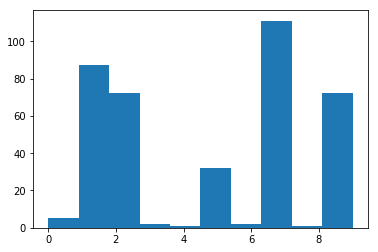

In [63]:
plt.hist(texasmerged2['Cluster Labels10'], bins = 10)

(array([87., 71.,  2., 30.,  1.,  1.,  1.,  7.,  1., 14.,  1., 53., 59.,
         1., 17.,  2., 29.,  3.,  1.,  4.]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <a list of 20 Patch objects>)

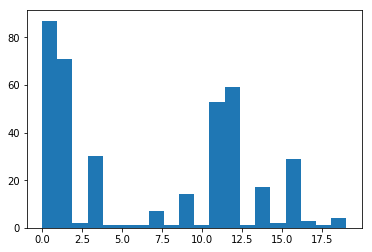

In [64]:
plt.hist(texasmerged2['Cluster Labels20'], bins = 20)

(array([ 89.,  34., 188.,  72.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

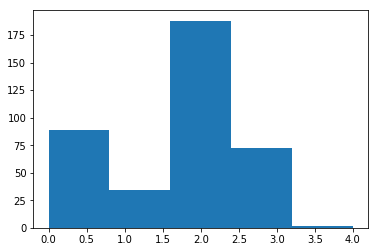

In [65]:
plt.hist(texasmerged2['Cluster Labels5'], bins = 5)